In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT
# June 2024

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [4]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_classes=3, n_clusters_per_class=1, 
                           n_features=2, n_informative=2, n_redundant=0, class_sep=0.8, random_state=42)

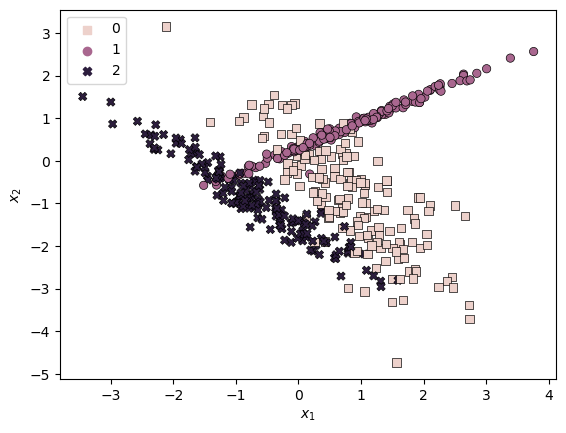

In [19]:
import seaborn as sns

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y, markers=('s', 'o', 'X'), edgecolor='black')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.savefig('figures/classification_data.pdf')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC#ensemble = VotingClassifier([('knn', clf2), ('nb', clf3), ('dt', clf4)], voting='soft')

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

# Initialize models
models = {
    #'Logistic Regression': KNeighborsClassifier(n_neighbors=3),
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    #'KNN2': KNeighborsClassifier(n_neighbors=10),
    'Gaussian NB': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    #'Random Forest': RandomForestClassifier(random_state=42),
    #'DT 2:': DecisionTreeClassifier(max_depth=5, random_state=42)
    
    #'AdaBoost': AdaBoostClassifier(algorithm='SAMME', random_state=42),
    #'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    #'Hist Gradient Boosting': HistGradientBoostingClassifier(random_state=42),
    #'MLP': MLPClassifier(random_state=42)
}
ensemble = VotingClassifier(list(models.items()), voting='soft')
models['Voting Ensemble'] = ensemble

for name, model in models.items():
    #scores = cross_val_score(model, X, y, cv=5)
    #print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f}) [{name}]')
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f'{name}\nAccuracy (train): {train_score:.4f}, Accuracy (test): {test_score:.4f}')

Logistic Regression
Accuracy (train): 0.8453, Accuracy (test): 0.8400
KNN
Accuracy (train): 0.9280, Accuracy (test): 0.9200
Gaussian NB
Accuracy (train): 0.7653, Accuracy (test): 0.7920
Decision Tree
Accuracy (train): 1.0000, Accuracy (test): 0.9040
Voting Ensemble
Accuracy (train): 0.9520, Accuracy (test): 0.9440


In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(classifier, X, y, feature_names, class_labels, ax=None, legend='auto'):
    """Plot the decision boundaries of a classifier along with the dataset points.

    Parameters:
    - classifier: The trained classifier.
    - X: Feature dataset.
    - y: Target labels.
    - feature_names: List of feature names for labeling the axes.
    - class_labels: List of class labels for coloring the points.
    - ax: Matplotlib Axes object where the plot is drawn. If None, uses current axis.
    - legend: Controls the drawing of the legend. Use False to disable the legend.
    """
    if ax is None:
        ax = plt.gca()
        
    # Define colors and markers
    colors = ['red', 'cyan', 'blue']
    markers = ['s', 'o', '^']
    cmap = ListedColormap(colors[:len(class_labels)])
      
    # Setup mesh grid parameters
    resolution = 250  # Number of sample points in each axis
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1     
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), 
                         np.linspace(y_min, y_max, resolution))
    
    # Classify each point in the mesh grid
    z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape) 
    
    # Generate contour plot
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.4)  
    
    # Map the numeric labels to class labels for coloring and legend
    hue_labels = np.array(class_labels)[y.astype(int)]
    
    # Plot the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=hue_labels, style=hue_labels, 
                    palette=colors, markers=markers, edgecolor='k', ax=ax, legend=legend)
    
    # Plot the training points
    #sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y, 
    #                palette=colors, markers=markers, edgecolor='k', ax=ax, legend=legend)

    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])    

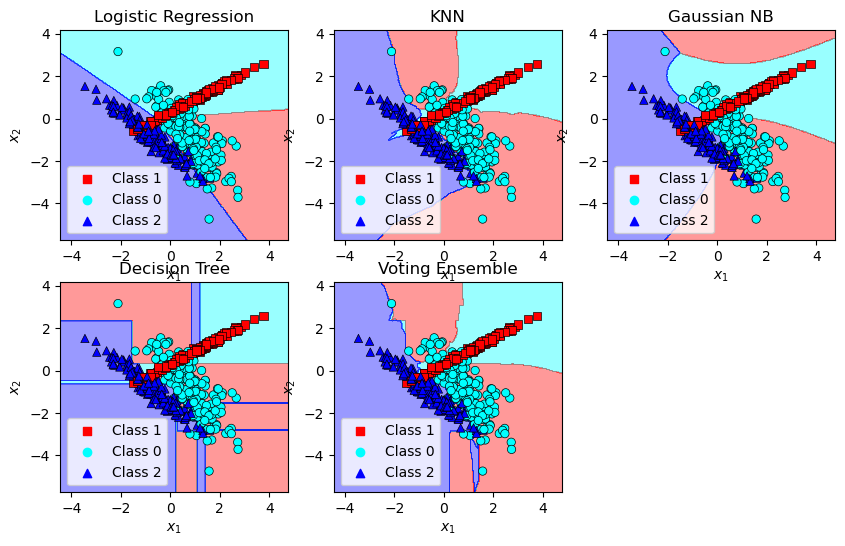

In [11]:
feature_names = ['$x_1$', '$x_2$']
class_labels = np.array(['Class 0', 'Class 1', 'Class 2'])
#class_labels = np.array(['Class 0', 'Class 1'])
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for name, model, ax in zip(models.keys(), models.values(), axes.flat):
    model.fit(X_train, y_train)
    plot_decision_boundaries(model, X, y, feature_names, class_labels, ax=ax)
    ax.set_title(name)
    
axes[1][2].axis('off')    
plt.savefig('figures/voting_classifier.pdf')